This notebook present the climatology of surface winds

In [1]:
# Load basic library for calculating and visualization

%config IPCompleter.greedy = True
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
    
import numpy as np
import xarray as xr
import senpy as sp

import matplotlib.pyplot as plt
plt.style.use('science')

# Load ERA5 reanalysis surface winds
wind_ds = sp.ERA5_onelevel_vars(vars=['u10', 'v10'], time_slice=slice('1979-01', '2022-12'))
wind_m  = wind_ds.clim.climatology(clim_slice=slice('1979-01', '2022-12')).mean('month').load()

## plot annual mean surface wind climatology 

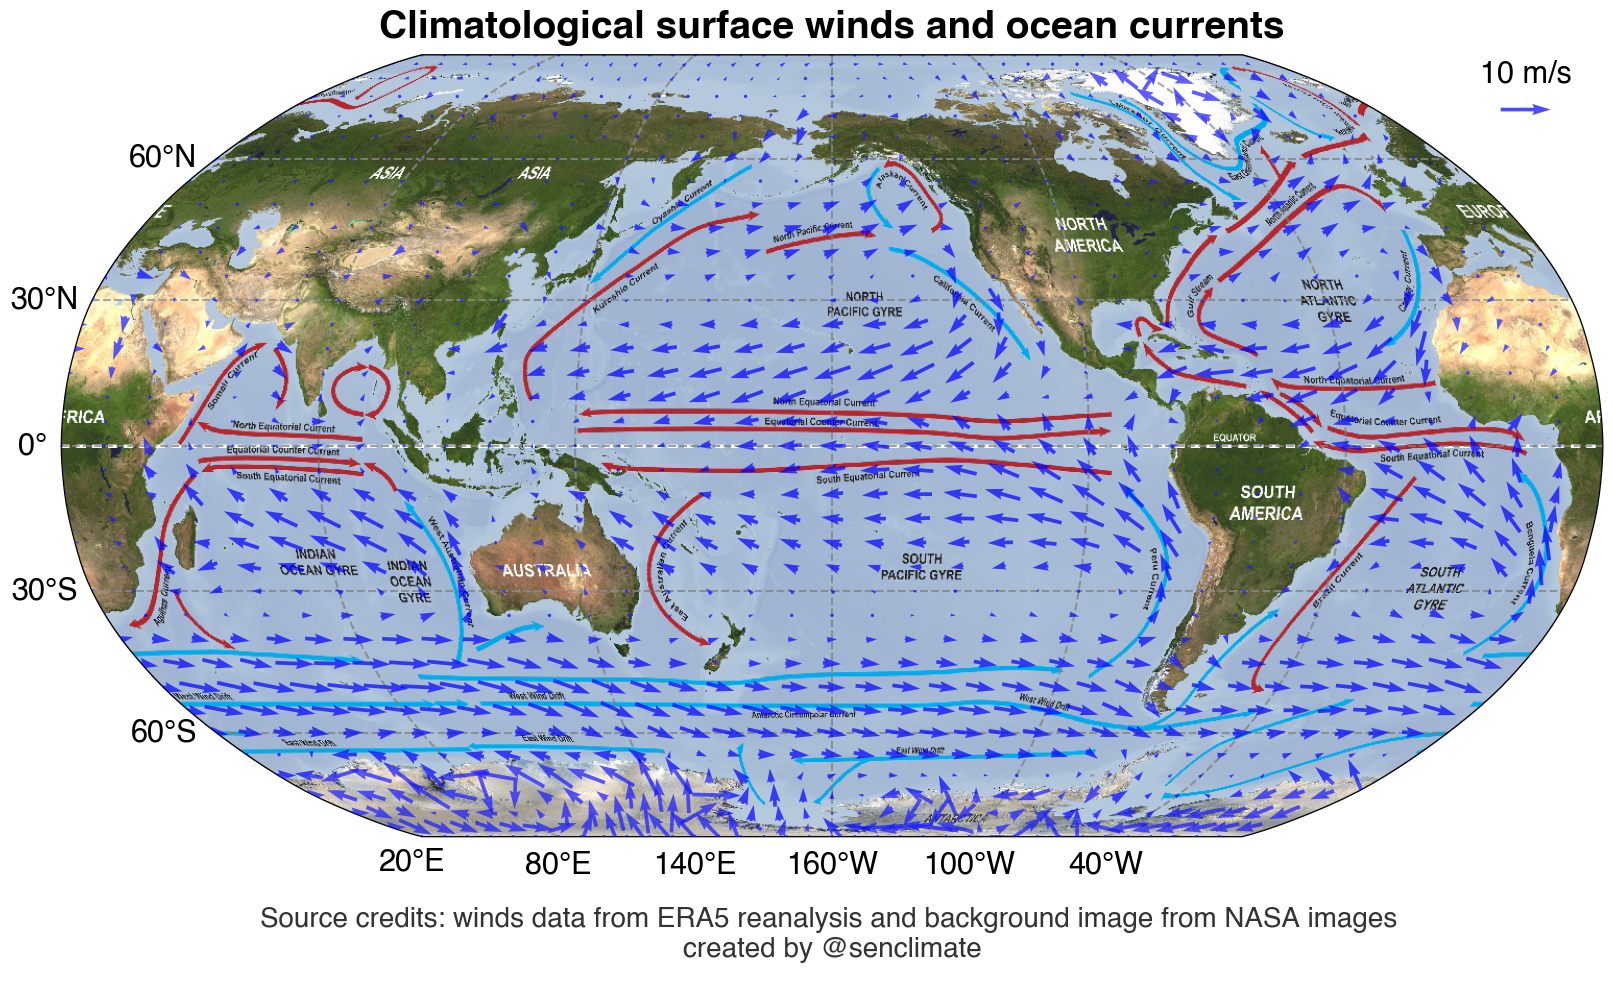

In [2]:
dlon = 10
dlat = 5

u = wind_m['u10'][::dlat, ::dlon]
v = wind_m['v10'][::dlat, ::dlon]

fig, ax = sp.map_subplots(1, 1, figsize=(10, 5), proj='robin', lon_0=200, aspect=1.2, layout='compressed')

quiver_scale = 40        # 40 m/s corresponds to 1 inch on the plot
quiver_key_length = 10   # The reference arrow in the legend represents 10 m/s

Q = ax.quiver(u.lon, u.lat, u.values, v.values, scale=quiver_scale, scale_units='inches',
              transform=sp.data_crs, pivot='middle', color='blue', zorder=5, alpha = 0.7)

# Add a key to the plot to show vector scale
qk = ax.quiverkey(Q, 0.95, 0.93, quiver_key_length, f"{quiver_key_length} m/s",  labelpos='N', coordinates='axes')

# sp.map_coastline(ax, color='green')
sp.map_landmask(ax, fc='white', alpha=0.1)
sp.map_ticks(ax, lon_ticks=np.arange(20, 360, step=60) )
ax.set_title("Climatological surface winds and ocean currents", fontsize=14, fontweight='bold')

# overlayed image of ocean currents pattern credited from NASA images (ftp://public.sos.noaa.gov/oceans/)
sp.map_background_img(ax, name='NASA_simple_currents')

# Add dataset and map sources
source_text = """
Source credits: winds data from ERA5 reanalysis and background image from NASA images 
created by @senclimate
"""
ax.text(0.5, -0.2, source_text, transform=ax.transAxes, 
        fontsize=10, color='black', alpha=0.8, 
        ha='center', va='bottom', zorder=6);


### 1. Trade Winds

#### North and South Equatorial Currents
In the tropics, the prevailing winds are the easterly trade winds. These winds blow from east to west, driving the surface waters, which results in the formation of the **North and South Equatorial Currents** that flow in the same direction as the winds.

#### Equatorial Counter Current

- **Coriolis Effect**: Due to the Earth's rotation, moving fluids (like air and water) are deflected by the Coriolis effect. Near the equator, the Coriolis effect is weakest, which means water can pile up in the western part of ocean basins more than in the eastern part.

- **Difference in Sea Level**: Because of the consistent push of the trade winds and the Coriolis effect, the sea level in the western tropical oceans is higher than in the eastern tropical oceans. This creates a gradient, or a slope in the sea surface, from west to east.

- **Return Flow**: To balance the accumulation of water in the western tropics and the sea surface height difference, there is a return flow of water at the surface from west to east. This return flow occurs in a narrow band along the equator and is known as the **Equatorial Counter Current**.

- **Upwelling**: In some areas, especially off the coast of continents (like off the west coast of Africa in the Atlantic), cold water from the depths is brought to the surface due to the divergence of surface waters. This upwelling, especially in the eastern part of ocean basins, reinforces the east-west sea surface height gradient.

### 2. Westerlies

In the mid-latitudes (between 30° and 60°), the prevailing winds are westerlies, blowing from west to east. These influence the formation of mid-latitude oceanic gyres.

### 3. Gyres 
Large, circular loops of water present in main ocean basins. Each ocean basin typically has a gyre in both the northern and southern hemispheres. Gyres comprise:
- Equatorial currents
- Western boundary currents (e.g., the Gulf Stream in the North Atlantic)
- Eastern boundary currents (e.g., the California Current in the North Pacific)
- High-latitude currents

### 4. Coriolis Effect 
Due to Earth's rotation, moving fluids deflect to the right in the Northern Hemisphere and to the left in the Southern Hemisphere. This effect is pivotal for the gyres and oceanic current direction.

### 5. Ekman Phenomena
- **Ekman Spiral**: A profile of water movement through depth with each successive layer moving at a slightly different angle due to the wind's influence and the Coriolis effect.
- **Ekman Transport**: The net transport of water resulting from the Ekman Spiral, typically at a 90° angle to the wind direction.

### 6. Vertical Movements
- **Upwelling**: Where wind drives surface waters away, deeper, colder, nutrient-rich waters rise to the surface.
- **Downwelling**: In areas where wind pushes surface waters toward the coast or converges, water sinks.

### 7. Boundary Currents
- **Western Boundary Currents**: Narrow, fast, and deep currents (e.g., Gulf Stream, Kuroshio Current).
- **Eastern Boundary Currents**: Broader, slower, and shallower currents (e.g., California Current, Canary Current).

Combined with thermohaline circulation, wind-driven circulation forms the **global ocean conveyor belt**, essential for redistributing heat, regulating climate

